# Product Notebook Final
2022-DATA3406-CC06-Group03

## Content
1. Problem elicitation, definition
2. Ethical assessment
3. Data Engineering
4. Exploratory Data Analysis
5. Confirmatory Data Analysis
6. Reporting the results
7. Make Decisions
8. Limitations
9. Reference

Working Date: 10.1-10.9

## 1 Problem elicitation, definition
* Contributor: Cabiria
* Contribution: Overall

### 1.1 Background
Personal daily exercise monitoring has grown more convenient and common as electronic devices like smartphones, smart watches, and sports bracelets have gained popularity. Walking is one of the most prevalent daily activities, and numerous studies have examined people's activity levels by tracking their daily steps. In this fashion, more and more people want to gain insights of level in physical activity and inactivity with powerful tools.

### 1.2 Problem

This study aims to explore the individual's activity trends across the week (such as weekdays versus weekends) through step count data collecting from Apple health during 2022. We explore the trends across the week based on specific details: difference trend between weekday & weekend, step intensity pattern and adherence measures for one participant.

Working Date: 10.10-10.12

## 2 Ethical Analysis
* Contributor: Bohan
* Contribution: Overall

### 2.1 Potential Stakeholders
  * Participant
    * Advantage:
      Through the step count trend, you can systematically understand your exercise habits and plan and improve your daily exercise volume based on the analysis results in order to be healthier.
    * Cons:
      Private information such as personal work and rest habits, as well as professional identity, may be revealed by detailed information such as hourly to a number of steps.
  * Privacy and transparent
    * The raw datasets include  the step data obtained from Apple Health exported. To preserve the participants' privacy, the dataset is collected anonymously, and the researcher will not see any information about the individual characteristics, such as name and gender. Only three variables necessary for later analysis are preserved, ensuring minimal data collection to protect personal privacy. Furthermore, the data-collecting process is completed by the participants themselves via APP and the primary use of the data is confirmed and transparent.

### 2.2 Raw data

* Data Structure
  * There are  3 variables:
    * **Start** and **Finish**: time variables accurate to minutes; beggning at 0 AM each dat; one hour per period as one row
    * **Step (count)**: numeric varible represent the participant's total number of step taken throughout the hour. 
  * The data ranges from 1 Jan 2022 up to 31 Aug 2022 

* Data Characteristics
  * Continuity: great continuity with no gaps in the step count records and no missing value
  * Consistency: high consistency, uniform data format
  * Coherence: good coherence among datasets since structures of different datasets from different individuals are constant

* Immutability 
  * The data used in this product's notebook adheres to the immutability principle, and the data used for analysis is authentic, genuine, and has not been altered in any way. Researchers analyse and produce trending results based on raw data with objectivity and objectivity.

Working Date: 10.12-10.15

## 3 Data Engineering
* Contributor: Cabiria, Bohan, Eva
* Contribution
    * Literate programming: Eva, Cabiria
    * Code: Cabiria, Bohan

In data processing, we add more variables by reshaping the dataset to answer these questions. In the complete datasets, there are seven variables:
1. hourly_step: (int) the step calculation per hour
2. date: (date) using the date format: YYYY-MM-DD
3. weekday: (string) day of week based on the date, it contains Monday to Sunday
4. time_hour: (int) time hour from 0 to 24
5. month: (int) this date are in which month, from Jan to Dec season
6. season: (string) this data are in which season, from spring to winter
7. is_weekend: (string) if this is weekday or weekend

Overall section 3 working date: 10.10-10.17

Firstly, we import library to import and reshape the dataset then plot the graph based on dataset.

In [20]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap
import ipywidgets as widgets

print ("seaborn version: " + sns.__version__)
print ("matplotlib version: " + mpl.__version__)
print ("numpy version: " + np.__version__)
print ("pandas version: " + pd.__version__)
print ("widgets version: " + widgets.__version__)

seaborn version: 0.11.2
matplotlib version: 3.5.1
numpy version: 1.21.5
pandas version: 1.4.2
widgets version: 7.6.5


### Gaining familiarity (Eva)
Gaining familiarity is the first data exploration you did with the data. Eg finding out how big the dataset is and how many missing values there are etc.

For season, our group define a function called season with inner variable month. If the month is 9,10,11 then return Spring. If the month is 12,1,2 then return Summer. If the month is 3,4,5 then return Autumn. Others return Winter.

In [21]:
def season(month):
    if month == 9 or month == 10 or month == 11:
        return "Spring"
    elif month == 12 or month == 1 or month == 2:
        return "Summer"
    elif month == 3 or month == 4 or month == 5:
        return "Autumn"
    else:
        return "Winter"

For define this day is weekday or weekend, we also define a function called is_weekend. If this date is weekend, then the value in this row would be weekend. Else would be workday。

In [22]:
def is_weekend(weekday):
    if weekday == "Sunday":
        return "weekend"
    elif weekday == "Saturday":
        return "weekend"
    else:
        return "workday"

Then, we define the overall function to process the data. When we put a file name into this function, it would return the basic information of complete data and the first five rows of this dataset. More details would be explained in the code block.

In [23]:
def data_processing(file):
    participant = pd.read_csv(file, parse_dates = ['Start','Finish']) # read csv file, parse time directly
    # print(participant.info())
    # separate date and hour
    participant["date"] = participant["Start"].dt.date # create new column "date" using dt.data method to save the date only
    participant["weekday"] = participant["Start"].dt.day_name() # create new column'weekday' using day_name() to identify day of week
    participant['time_hour'] = participant['Start'].dt.hour # create new column'time_hour' u sing dt.hour to identify exact hours for this date
    participant['month'] = participant['Start'].dt.month # create new column'month' using dt.month to identify which month the day is in
    participant['season'] = participant['month'].apply(season) # create 'season' column。 The month column calls the season method to differentiate between the seasons of the day
    participant['is_weekend'] = participant.apply(lambda x: is_weekend(x.weekday), axis = 1)
    # apply is_weekend() method to diefine if it is a weekend
    participant = participant.drop(['Start', 'Finish'], axis=1) # drop 'start' and 'finish' columns
    participant.rename(columns = {'Steps (count)':'hourly_step'}, inplace = True) # rename column
    participant['hourly_step'] = participant['hourly_step'].astype(int) # convert float to integer
    return participant # return dataframe

## 4 Exploratory Data Analysis
There are three sections in EDA

* Distribution of Daily Steps
* Distribution of daily steps across weekday
* Heatmap of weekly daily steps level trends

### 4.1 Distribution of Daily Steps
* Contributor: Bohan
* Contribution: Ovarall


* Motivation: The method of viewing data step-by-step using histograms before starting problem-specific data analysis has been widely applied in a number of data analysis projects. By investigating the data distribution, the goal is to ascertain whether the data follows a Gaussian distribution and whether it is skewed, in order to more appropriately determine the subsequent statistical measurement methods and testing methods.


4.1 working date: 10.17-10.19

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


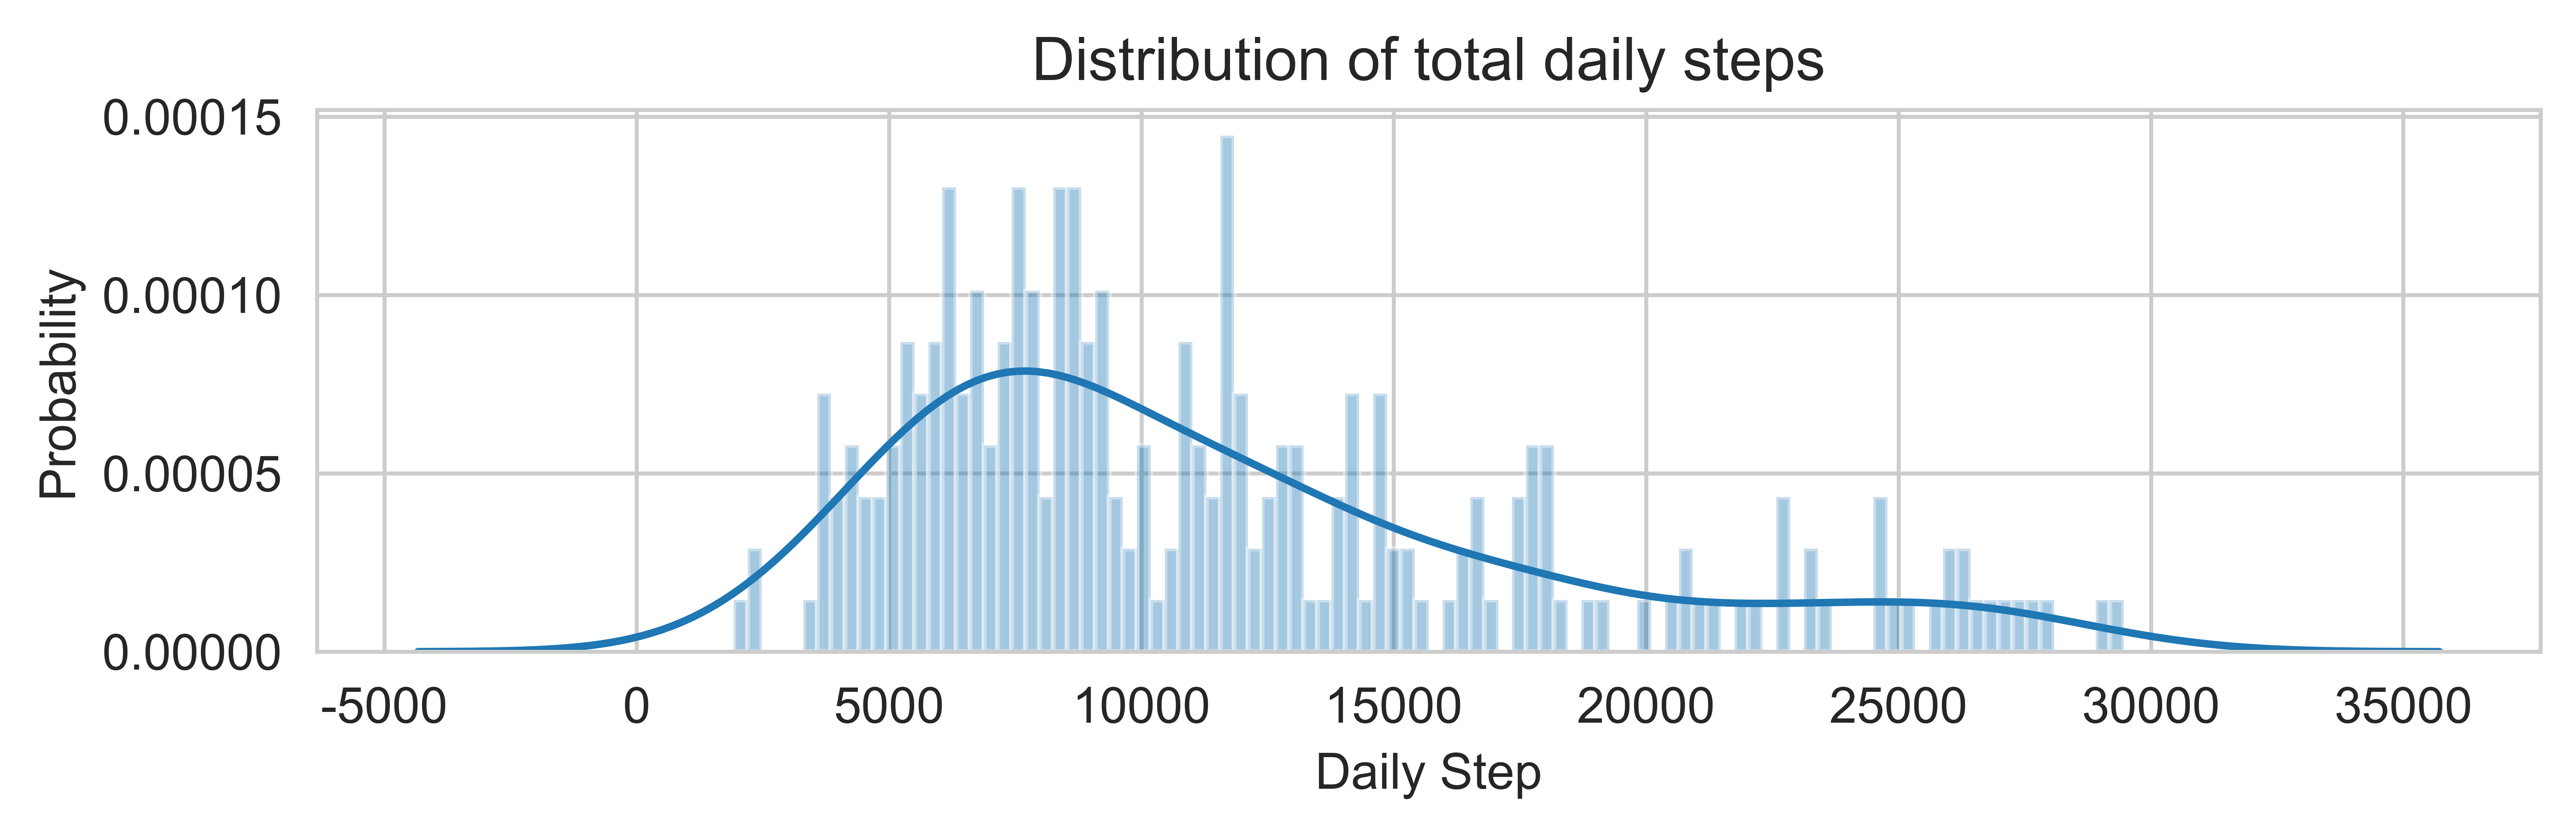

In [25]:
participant = data_processing("Participant-04.csv")
group_by_day = participant.groupby(['date', 'weekday','month', 'is_weekend']).sum().reset_index()
group_by_day = group_by_day.rename(columns = {'hourly_step':'daily_step'})
group_by_day = group_by_day.copy()
plt.figure(dpi = 1000, figsize = (8,2))
sns.set_style("whitegrid")
sns.distplot(group_by_day.daily_step, bins = 100)

plt.title('Distribution of total daily steps')
plt.xlabel('Daily Step')
plt.ylabel('Probability')
plt.show()

* Histogram analysis: 
  * The histogram's vertical axis is probability, and its horizontal axis is the number of daily steps. Each bin's height indicates how frequently a participant takes the specified number of steps, which can reveal a trend in the distribution of steps.
  * By fitting the step number distribution with the curve shown in this figure, it can be roughly determined whether the step number distribution conforms to the Gaussian distribution, or the normal distribution (showing a symmetrical bell shape).
  * For participant-04 as the sample of this product notebook: 
    * The histogram shows that the distribution of the participant's total daily steps spans a wide range, from 2,500 steps to over 30,000 steps, with the probability peak of the distribution occurring at around 12,000 steps. Moreover, The distribution of the total number of daily steps is concentrated between 5,000 and 10,000 steps, which is skewed to the right and does not fit the Gaussian distribution.

### 4.2 Distribution of daily steps across weekday
* Contributor: Bohan
* Contribution: Overall


* Motivation: The boxplot can highlight the median, quartile, outlier, and other statistically significant values in addition to showing how the data is distributed. The median rather than the mean is a better predictor of the participant's trend, especially for skewed data.
4.2 working date: 10.18-10.20

Text(0, 0.5, 'Daily Steps')

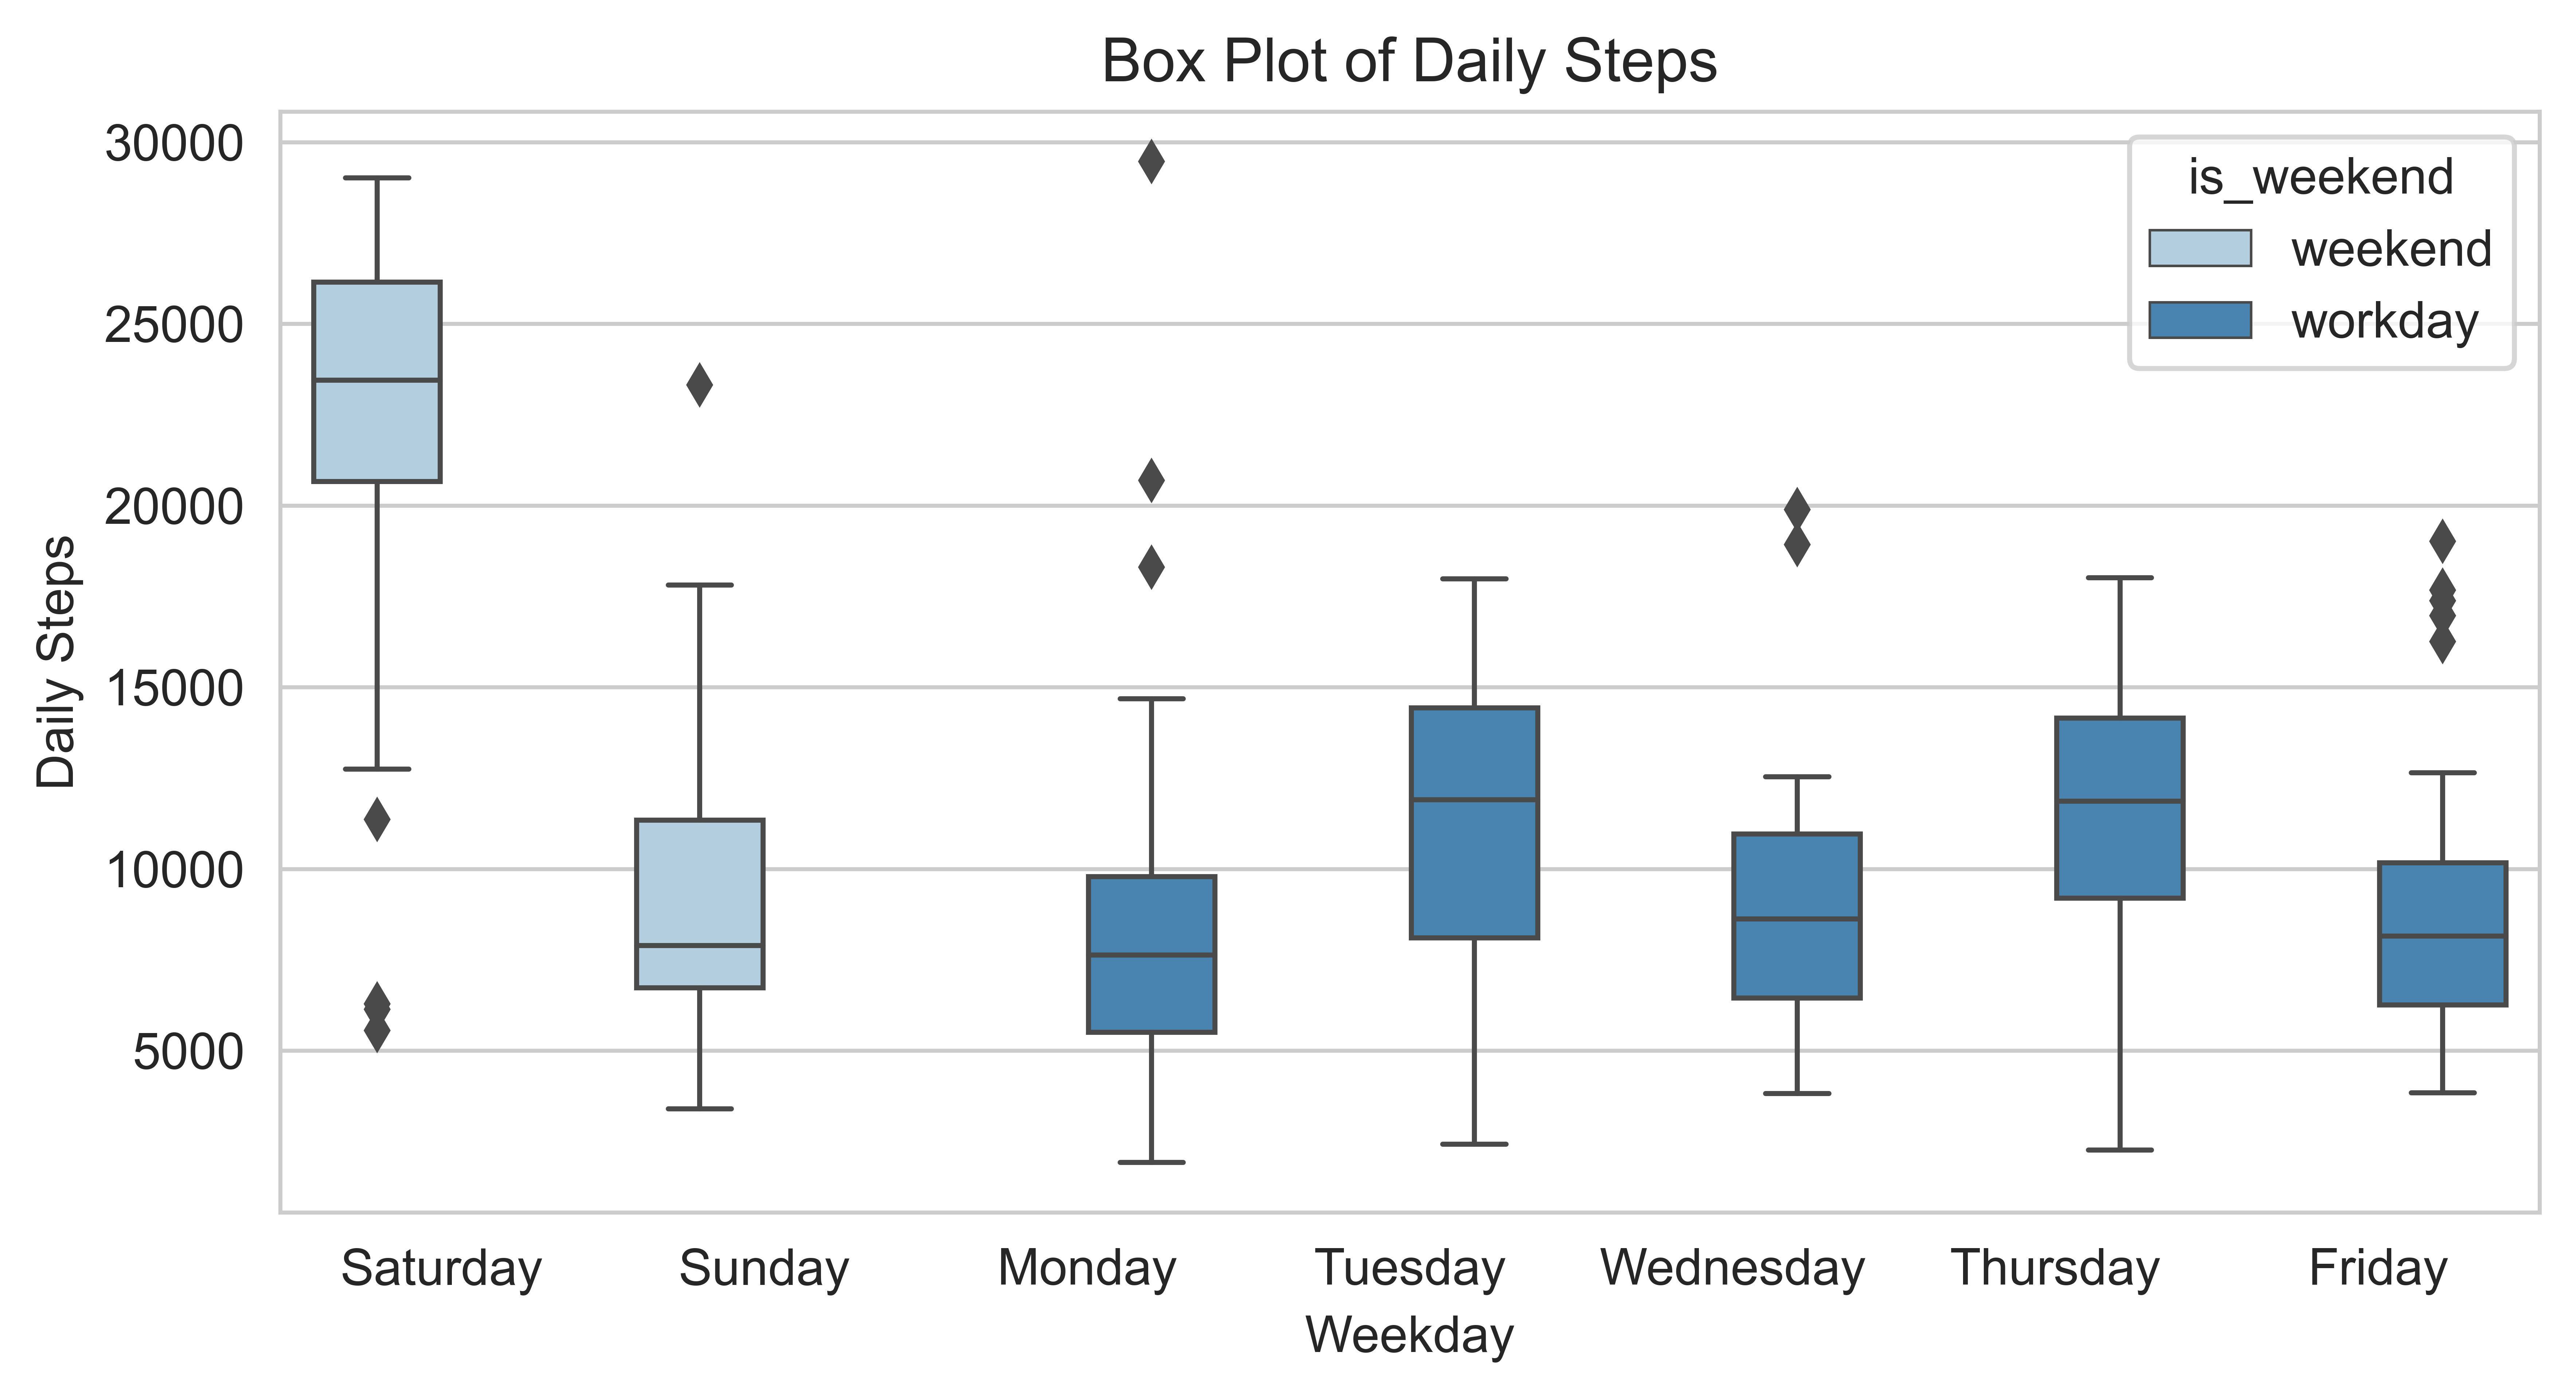

In [6]:
plt.figure(dpi = 1000, figsize = (8,4))
sns.set_style("whitegrid")

ax = sns.boxplot(x="weekday", y="daily_step", hue="is_weekend",
            data=group_by_day, linewidth=1.0,  palette="Blues")



plt.title('Box Plot of Daily Steps')
plt.xlabel('Weekday')
plt.ylabel('Daily Steps')

* Analysis for box plot: 
  * The total number of daily steps is the vertical axis of the grouped boxplot, which has weekday as the horizontal axis. A week is defined as seven days, from Monday to Sunday. Different boxes show the distribution of daily steps on various weekdays, with weekends and workdays being indicated by different colour schemes. The participant's median is depicted by the line in the centre of the box, and the scattered dots outside are outliers.
  * We can clearly see the difference in the participant's daily walking amount on various weekdays by comparing the heights of different boxplots.
  * For participant-04 as the sample of this product notebook: 
    * Through the box plot across every weekday, the median daily total steps differed between weekdays, with Saturday having a significantly higher distribution of steps than the other weekdays. Despite the presence of Outliers, daily steps of any size of the single individual have reasonable practical importance in this scenario. As a result, outliers will be retained in further analysis.

### 4.3 Heatmap of weekly daily steps level trends
* Contributor: Cabiria
* Contribution: Overall

Motivation: Use Heatmap to analyze weekly daily steps level trends.

4.3 working date: 10.18-10.21

/var/folders/s7/g3qmtvqd5hx22kqhkgdq75pm0000gn/T/ipykernel_86183/726308945.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  group_by_day['weeknumber'] = group_by_day['date'].dt.week # transfer to week number


Text(0.5, 1.0, 'Heatmap across weeks')

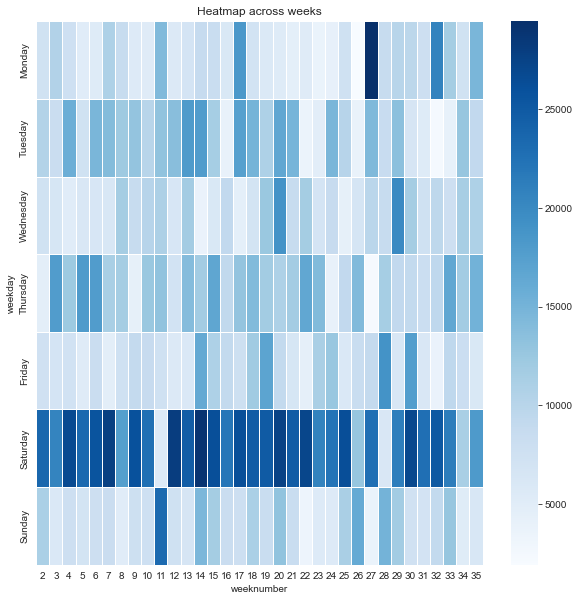

In [7]:
group_by_day['date'] = pd.to_datetime(group_by_day['date'], errors ='coerce') # group by day based on the column called date
group_by_day['weeknumber'] = group_by_day['date'].dt.week # transfer to week number
participant_heatmap = group_by_day.pivot("weekday", "weeknumber", "daily_step") # Using heatmap
participant_heatmap.index = pd.CategoricalIndex(participant_heatmap.index, categories= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]) # redefined index
participant_heatmap.sort_index(level=0, inplace=True) # put index into the heatmap

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(participant_heatmap.iloc[:, 1:35:], annot=False, linewidths=.9, ax=ax,cmap="Blues")
plt.title('Heatmap across weeks')

Heatmap summary:
The participant exhibits some cross-week regularity. Almost every Saturday, the participant walk the most, followed by Tuesday and Thursday. And the amount of walking is reduced on other weekdays. Despite the regularity, there are some outliers, such as Sunday in week 11 and Monday in week 27, with much higher step counts.

## 5 Confirmatory Data Analysis
There are three sections in EDA:
5.1 What's average hourly step trend across Workday and Weekend?
5.2 How Adherence Measures affects weekly trend (Odd & Even)?
5.3 What's the difference step pattern between weekday & weekend?

### 5.1 What's average hourly step trend across Workday and Weekend?
* Contributor: Bohan
* Contribution: Overall

* Motivation: Connecting data points with a line chart can help to better reflect the trend of the average step count over time. You can also compare the trend difference of the step count across the week by using the colour tone to differentiate between the trend lines of the working day and the rest day.

5.1 working date: 10.15-10.17

Text(0, 0.5, 'Average hourly step')

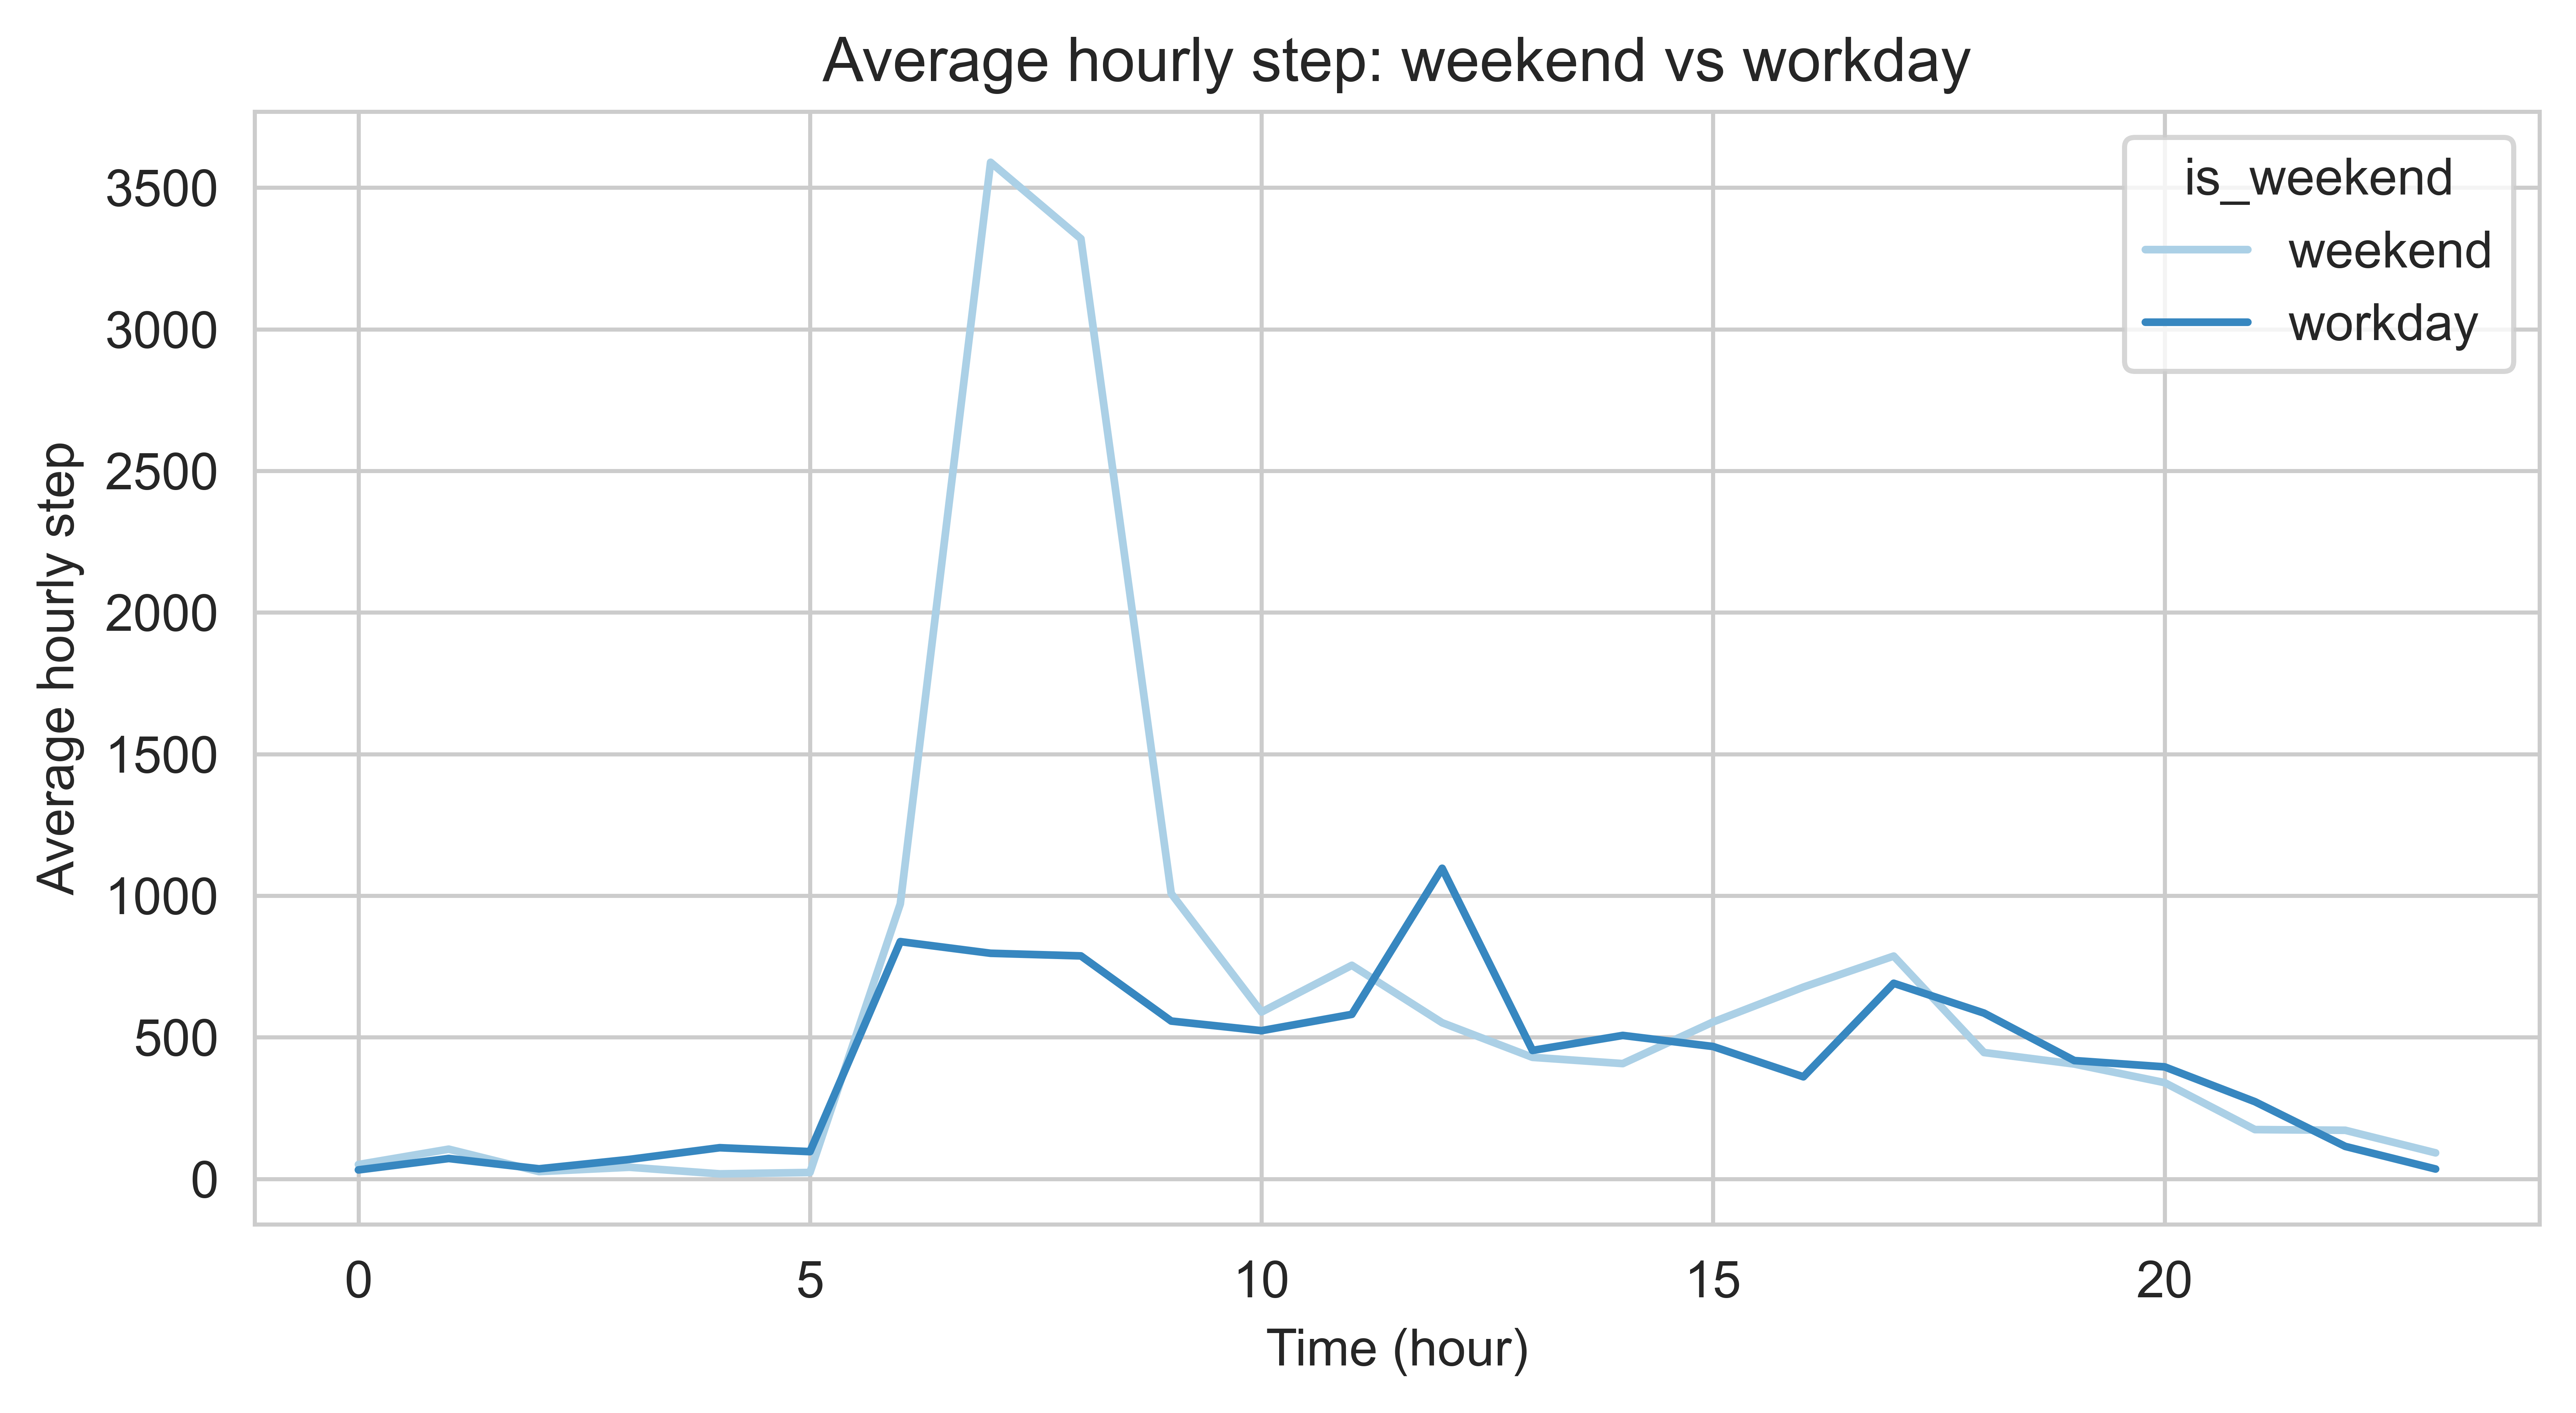

In [8]:
avg_hourly = participant.groupby(['time_hour', 'is_weekend'])['hourly_step'].mean().reset_index()
avg_hourly = avg_hourly.rename(columns = {'hourly_step':'average_hourly_step'})
plt.figure(dpi = 1000, figsize = (8,4))
sns.set_style("whitegrid")
sns.lineplot(x = "time_hour", y = "average_hourly_step", hue = "is_weekend", data = avg_hourly,
             palette="Blues")
plt.title('Average hourly step: weekend vs workday')
plt.xlabel('Time (hour)')
plt.ylabel('Average hourly step')

* Data analysis of line chart: 
  * The x-axis of this line graph is time, running from 0:00 to 23:00, and the y-axis is the participant's average number of steps per hour, or stride frequency.
  * The average stride frequency on weekdays and weekends is represented by the two-tone polylines. By contrasting the polyline's trend, you can determine how much walking is done on weekdays and weekends.
  * For participant-04 as the sample of this product notebook: 
    * In the line graph, the light blue line represents the average hourly steps across the weekends and the dark blue represents the workdays. By looking at them, the similarity is that both lines have three peaks in graph. From 7am to 8am, 11am to 12pm and 4pm to 5pm.
    * The difference is that on weekends the peak in morning becomes very high at around 3500 steps, much higher than on workdays. Our analysis suggests that participant generally exercises on weekend mornings, while on workdays he goes to work in the morning so there is a peak, and the peak at midday and afternoon is probably when participant go to lunch, and leave work for dinner.

### 5.2 How Adherence Measures affects weekly trend (Odd & Even)?
* Contributor: Cabiria, Eva
* Contribution
    * Literate programming: Eva, Cabiria
    * Code: Eva, Cabiria

* Motivation
  This question is how adherence measures affects weekly trend between odd and even day. We introduce adherence measures. Adherence is a measure of Goal-Valid-Day, based on how much people worn their physical activity trackers. using adherence measures is to show reliable measure of activity level and active time, which approach intense interest in health literature
* Adherence Measures
Adherence measures is based on Goal-Valid-Day. The goal met is defined as reaching 10,000 steps. And the Valid day is defined as 10 hours wearing time.

5.2 working date: 10.20-10.24

Firstly, we define a new function called is_sleep. If the hourly step is 0, we assume this person is laying or sleeping.

In [9]:
def is_sleep(hourly_step):
    if hourly_step == 0:
        return 1
    else:
        return 0

Referring to the paper, adherence measure defines the Goal-Valid-Day.

In [10]:
def adherence(daily_steps,stand):
    if daily_steps >= 10000 and stand >= 10:
        return "Goal met (valid day)"
    elif daily_steps >= 10000 and stand < 10:
        return "Goal met (non-valid day)"
    elif daily_steps > 3000 and stand >= 10:
        return "Goal not met (valid day)"
    else:
        return "Goal not met (non-valid day)"


Referring to the paper, the step pattern is separated into several patterns.

In [11]:
def pattern(daily_step):
    if daily_step == 0:
        return "non_wearing_day"
    elif daily_step <= 500:
        return "non_active_day"
    elif daily_step <= 5000:
        return "Step level 1"
    elif daily_step <= 10000:
        return "Step level 2"
    elif daily_step <= 15000:
        return "Step level 3"
    elif daily_step <= 20000:
        return "Step level 4"
    else:
        return "Step level 5"

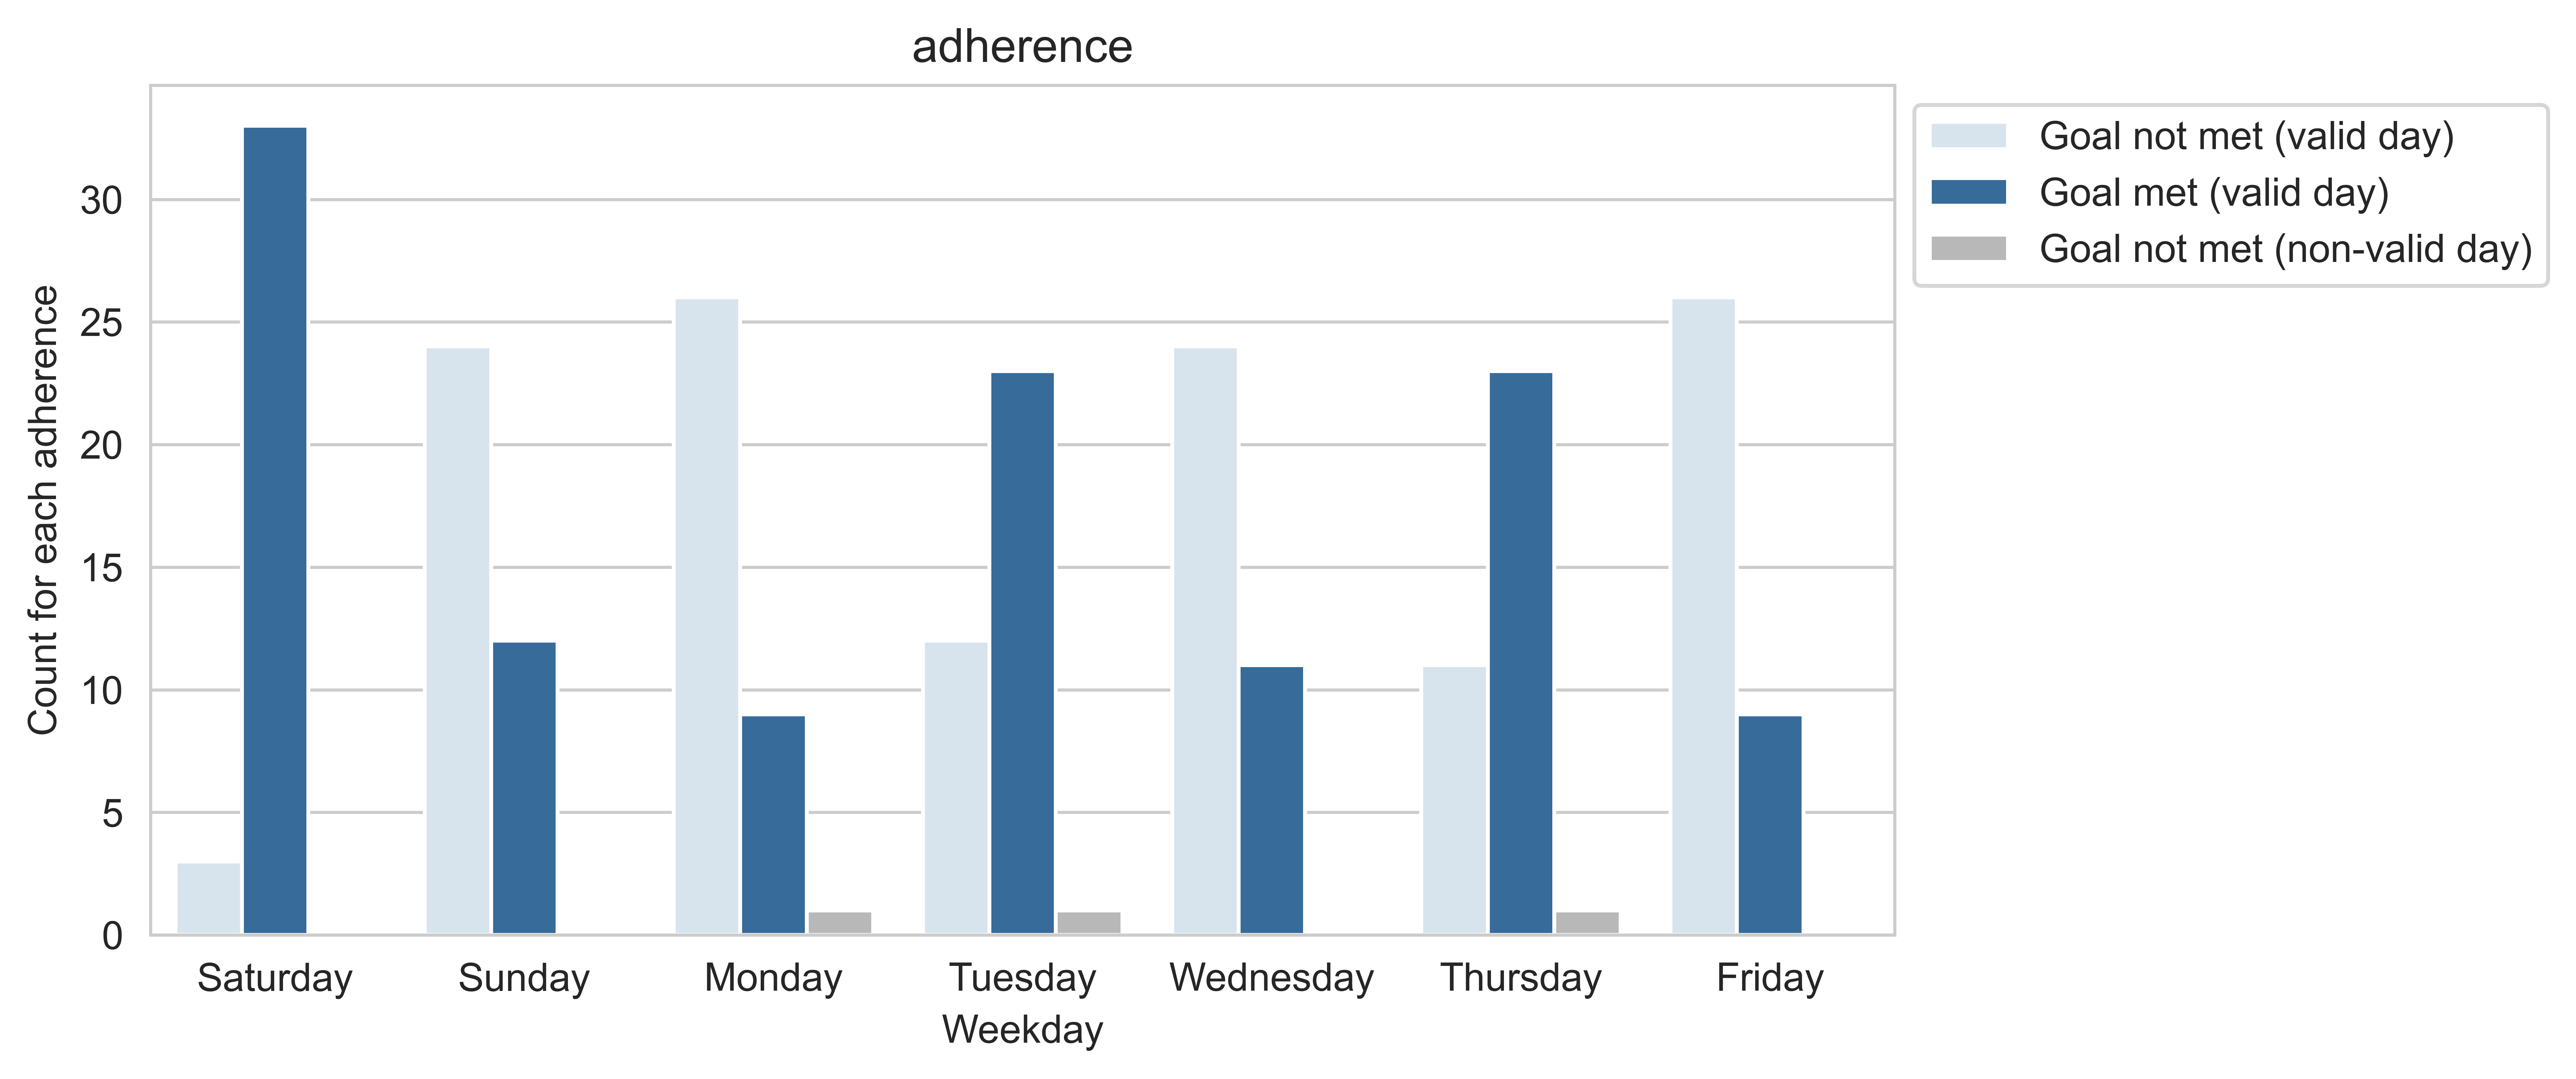

In [12]:
participant0 = data_processing("Participant-04.csv")
participant0['sleep'] = participant0['hourly_step'].apply(is_sleep)
participant0 = participant0.drop(['weekday', 'time_hour', 'month', 'season', 'is_weekend'], axis=1).drop(0)
participant0_merge = data_processing("Participant-04.csv").drop(['hourly_step','season','time_hour'], axis=1).drop(0)
participant0 = participant0.groupby('date', as_index=False).agg(lambda x : sum(x))
participant0.rename(columns = {'hourly_step':'daily_steps'}, inplace = True)
participant0 = participant0.merge(participant0_merge).drop_duplicates()
participant0.drop(participant0.tail(2).index,inplace = True) # drop the last two rows from Sep
participant0['pattern'] = participant0['daily_steps'].apply(pattern)
participant0['stand'] = abs(participant0['sleep']-24)
participant0['adherence'] = participant0.apply(lambda x: adherence(x.daily_steps, x.stand), axis=1)
plt.figure(dpi = 1000, figsize = (8,4))
sns.set_style("whitegrid")

sns.countplot(data = participant0, x = 'weekday', hue = 'adherence',palette=["#d3e4f2","#256cab","#b8b8b8","#63C5DA"])

plt.title('adherence')
plt.xlabel('Weekday')
plt.ylabel('Count for each adherence')
plt.legend(bbox_to_anchor = (1,1))

Summary:
In generally, most of the weekdays are valid days. Also, the number of goals not met day is larger than that of in goal met day, indicates the moderate activity level weekly. To be specific, active time in wearing is enough across the week. More importantly, this participant has regular exercise cycle, the odd day of the week is goal not met but that of in even day is goal met. We suppose that he rests a day then exercise a day. Also, it has very high activity level every Saturday.

### 5.3 What’s the difference step pattern between weekday & weekend?
* Contributor: Cabiria, Eva
* Contribution
    * Literate programming: Eva, Cabiria
    * Code: Eva, Cabiria

* Motivation
The next question is what’s the weekly step pattern between weekday and weekend? The step pattern is description of people’s behavior in tracker wear and step count level. This is beneficial to flexible data analysis in large data size and understand step behavior. We also show the difference step level definition on the right-hand side.

5.3 working date: 10.20-10.24

In [13]:
participant0_weekday = participant0[participant0["is_weekend"] == 'workday']
participant0_weekend = participant0[participant0["is_weekend"] == 'weekend']
summary_stats = participant0_weekday.groupby(["pattern"]).agg(
    mean_stand = ("stand", "max"),
    mean_step = ("daily_steps", "mean")
).reset_index()

summary_stats["mean_step"] = summary_stats["mean_step"].round(0)
summary_stats["mean_stand"] = summary_stats["mean_stand"].round(0)
trackNrs = participant0_weekday.groupby("pattern").size().to_frame('n').reset_index()
summary_all = pd.merge(summary_stats, trackNrs, "left", on = "pattern")

summary_all.loc[-1] = ["Non-wearing day", 0, 0,0]  # adding a row
summary_all.index = summary_all.index + 1  # shifting index
summary_all.sort_index(inplace=True)

summary_all.loc[-1] = ["Non-active day", 0, 0,0]  # adding a row
summary_all.index = summary_all.index + 1  # shifting index
summary_all.sort_index(inplace=True)

summary_all["percentage"] = (summary_all.n /  summary_all.n.sum())*100
summary_all["percentage"] = summary_all["percentage"].round(0)

/var/folders/s7/g3qmtvqd5hx22kqhkgdq75pm0000gn/T/ipykernel_86183/596430315.py:88: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = fig.colorbar(


Text(0.1, 0.83, '\nWeekday Step Pattern')

findfont: Font family ['Bell MT'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bell MT'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Bell MT'] not found. Falling back to DejaVu Sans.


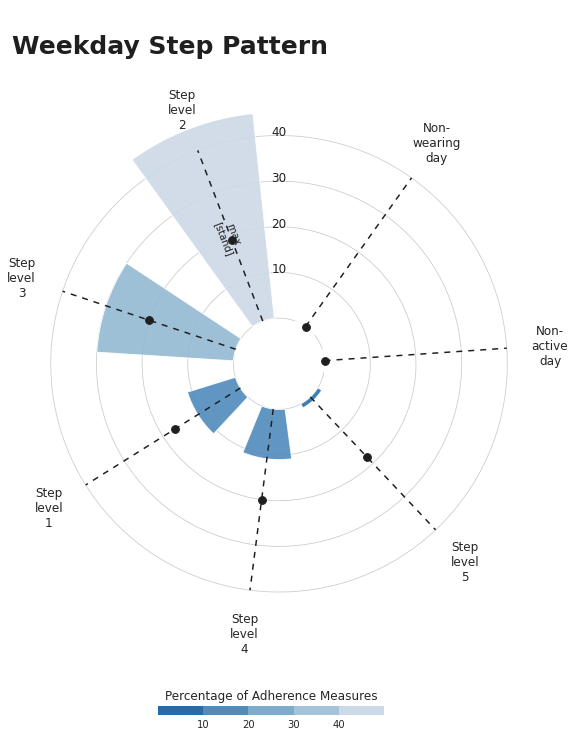

In [14]:
# Bars are sorted by the cumulative track length
df_sorted = summary_all.sort_values("percentage", ascending=False)
# Values for the x axis
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_sorted), endpoint=False)
# Cumulative length
PERCENTAGE = df_sorted["percentage"].values
# Mean gain length
MEAN_STAND = df_sorted["mean_stand"].values
# Region label
PATTERN = df_sorted["pattern"].values
# Number of tracks per region
TRACKS_N = df_sorted["n"].values
GREY12 = "#1f1f1f"
# Set default font to Bell MT
plt.rcParams.update({"font.family": "Bell MT"})
# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12
plt.rc("axes", unicode_minus=False) # The minus glyph is not available in Bell MT
COLORS = ["#256cab","#7cabcb","#ccd9e6"] # Colors
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256) # Colormap
norm = mpl.colors.Normalize(vmin=TRACKS_N.min(), vmax=TRACKS_N.max()) # Normalizer
# Normalized colors. Each number of tracks is mapped to a color in the
COLORS = cmap(norm(TRACKS_N)) # color scale 'cmap'

# Some layout stuff ----------------------------------------------
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"}) # Initialize layout in polar coordinates
# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-10, 45)

# Add geometries to the plot ------------------------------------
ax.bar(ANGLES, PERCENTAGE, color=COLORS, alpha=0.9, width=0.52, zorder=10) # Add bars to represent the cumulative track lengths
ax.vlines(ANGLES, 0, 40, color=GREY12, ls=(0, (4, 4)), zorder=11) # Add dashed vertical lines. These are just references
ax.scatter(ANGLES, MEAN_STAND, s=60, color=GREY12, zorder=11) # Add dots to represent the mean gain

# Add labels for the regions -------------------------------------
PATTERN = ["\n".join(wrap(r, 5, break_long_words=False)) for r in PATTERN] # The '5' means we want at most 5 consecutive letters in a word,
PATTERN

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(PATTERN, size=12);

# Remove unnecessary guides ---------------------------------------
ax.xaxis.grid(False) # Remove lines for polar axis (x)

# Put grid lines for radial axis (y) at 0, 1000, 2000, and 3000
ax.set_yticklabels([])
ax.set_yticks([0, 10, 20,30,40])

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(10)

PAD = 10
ax.text(-0.2 * np.pi / 2, 0 + PAD, "10", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 10 + PAD, "20", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 20 + PAD, "30", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 30 + PAD, "40", ha="center", size=12)

ax.text(ANGLES[0]+ 0.012, 20, "max \n[stand]", rotation=-69,
        ha="center", va="center", size=10, zorder=12)

# Add legend -----------------------------------------------------
fig.subplots_adjust(bottom=0.175) # First, make some room for the legend and the caption in the bottom.
# Create an inset axes.
# Width and height are given by the (0.35 and 0.01) in the
# bbox_to_anchor
cbaxes = inset_axes(
    ax,
    width="100%",
    height="100%",
    loc="center",
    bbox_to_anchor=(0.325, 0.1, 0.35, 0.01),
    bbox_transform=fig.transFigure # Note it uses the figure.
)
# Create a new norm, which is discrete
bounds = [0, 10, 20, 30, 40, 50]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Create the colorbar
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap=cmap),
    cax=cbaxes, # Use the inset_axes created above
    orientation = "horizontal",
    ticks=[10, 20, 30, 40]
)
cb.outline.set_visible(False) # Remove the outline of the colorbar
cb.ax.xaxis.set_tick_params(size=0) # Remove tick marks
cb.set_label("Percentage of Adherence Measures", size=12, labelpad=-40) # Set legend label and move it to the top (instead of default bottom)
# Add annotations ------------------------------------------------
fig.subplots_adjust(top=0.8) # Make some room for the title and subtitle above.
title = "\nWeekday Step Pattern" # Define title, subtitle, and caption
fig.text(0.1, 0.83, title, fontsize=25, weight="bold", ha="left", va="baseline") # And finally, add them to the plot.

The next step is computing the weekend step pattern in. This is the same method just different in dataset.

/var/folders/s7/g3qmtvqd5hx22kqhkgdq75pm0000gn/T/ipykernel_86183/465882462.py:81: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = fig.colorbar(


Text(0.1, 0.83, '\nWeekend Step Pattern')

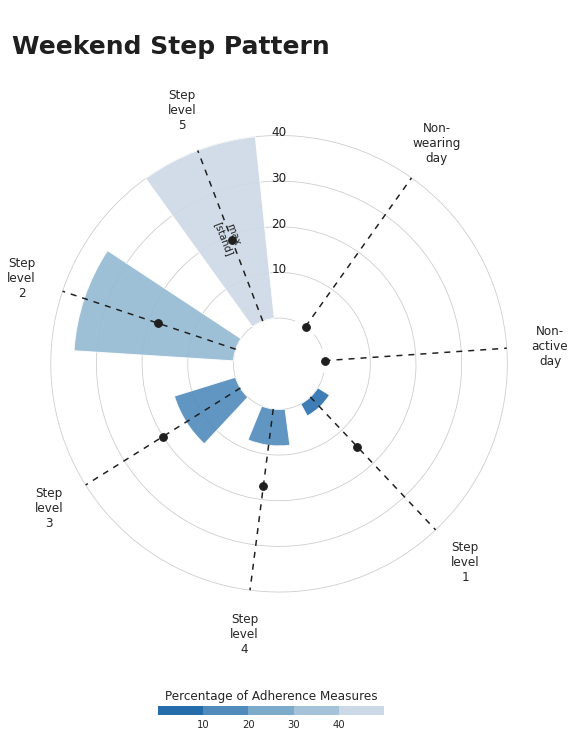

In [15]:
summary_stats = participant0_weekend.groupby(["pattern"]).agg(
    mean_stand = ("stand", "max"),
    mean_step = ("daily_steps", "mean")
).reset_index()

summary_stats["mean_step"] = summary_stats["mean_step"].round(0)
summary_stats["mean_stand"] = summary_stats["mean_stand"].round(0)
trackNrs = participant0_weekend.groupby("pattern").size().to_frame('n').reset_index()
summary_all = pd.merge(summary_stats, trackNrs, "left", on = "pattern")

summary_all.loc[-1] = ["Non-wearing day", 0, 0,0]  # adding a row
summary_all.index = summary_all.index + 1  # shifting index
summary_all.sort_index(inplace=True)

summary_all.loc[-1] = ["Non-active day", 0, 0,0]  # adding a row
summary_all.index = summary_all.index + 1  # shifting index
summary_all.sort_index(inplace=True)

summary_all["percentage"] = (summary_all.n /  summary_all.n.sum())*100
summary_all["percentage"] = summary_all["percentage"].round(0)

# Bars are sorted by the cumulative track length
df_sorted = summary_all.sort_values("percentage", ascending=False)

ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_sorted), endpoint=False) # Values for the x axis
PERCENTAGE = df_sorted["percentage"].values # Cumulative length
MEAN_STAND = df_sorted["mean_stand"].values # Mean gain length
PATTERN = df_sorted["pattern"].values # Region label
TRACKS_N = df_sorted["n"].values # Number of tracks per region
# Some layout stuff ----------------------------------------------
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"}) # Initialize layout in polar coordinates
# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")
ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-10, 45)
# Add geometries to the plot -------------------------------------
# See the order to manipulate which geometries are on top
ax.bar(ANGLES, PERCENTAGE, color=COLORS, alpha=0.9, width=0.52, zorder=10) # Add bars to represent the cumulative track lengths
ax.vlines(ANGLES, 0, 40, color=GREY12, ls=(0, (4, 4)), zorder=11) # Add dashed vertical lines. These are just references
ax.scatter(ANGLES, MEAN_STAND, s=60, color=GREY12, zorder=11) # Add dots to represent the mean gain
# Add labels for the regions -------------------------------------
PATTERN = ["\n".join(wrap(r, 5, break_long_words=False)) for r in PATTERN] # The '5' means we want at most 5 consecutive letters in a word,
PATTERN
# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(PATTERN, size=12);
# Remove unnecesary guides ---------------------------------------
ax.xaxis.grid(False)# Remove lines for polar axis (x)
# Put grid lines for radial axis (y) at 0, 1000, 2000, and 3000
ax.set_yticklabels([])
ax.set_yticks([0, 10, 20,30,40])
# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(10)
PAD = 10
ax.text(-0.2 * np.pi / 2, 0 + PAD, "10", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 10 + PAD, "20", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 20 + PAD, "30", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 30 + PAD, "40", ha="center", size=12)
ax.text(ANGLES[0]+ 0.012, 20, "max \n[stand]", rotation=-69,
        ha="center", va="center", size=10, zorder=12)
# Add legend -----------------------------------------------------
fig.subplots_adjust(bottom=0.175) # First, make some room for the legend and the caption in the bottom.
# Create an inset axes.
cbaxes = inset_axes(
    ax,
    width="100%",
    height="100%",
    loc="center",
    bbox_to_anchor=(0.325, 0.1, 0.35, 0.01),
    bbox_transform=fig.transFigure # Note it uses the figure.
)
# Create a new norm, which is discrete
bounds = [0, 10, 20, 30, 40, 50]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# Create the colorbar
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap=cmap),
    cax=cbaxes, # Use the inset_axes created above
    orientation = "horizontal",
    ticks=[10, 20, 30, 40]
)
cb.outline.set_visible(False) # Remove the outline of the color bar
cb.ax.xaxis.set_tick_params(size=0) # Remove tick marks
cb.set_label("Percentage of Adherence Measures", size=12, labelpad=-40) # Set legend label and move it to the top (instead of default bottom)

# Add annotations ------------------------------------------------
fig.subplots_adjust(top=0.8) # Make some room for the title and subtitle above.
title = "\nWeekend Step Pattern" # Define title, subtitle, and caption
fig.text(0.1, 0.83, title, fontsize=25, weight="bold", ha="left", va="baseline") # And finally, add them to the plot.

Summary:
There is same proportion between weekday and weekend step pattern. However, they show totally different step level order from low to high percentage. The highest percentage step level in weekday is level 2 but that of in weekend is level 5.

Also, we suppose that higher standing hours leads to high step level. But from the graph the black points show the maximum stand hours per step level. It doesn’t show an significant relationship between them.


## 6 Reporting the results
* Contributor: Bohan, Cabiria
* Contribution: Overall

### Bias

### Results
Overall, this report shows participants' weekly patterns in terms of hourly average stride frequency and daily total steps. Through histograms, boxplots, and bar charts, it is clear that the participant's steps on workdays and rest days varied slightly, with Saturdays having much higher total daily steps than other days. In addition, hypotheses concerning the quantity of activity were developed, and the participant's physical condition and exercise level were evaluated. The participants' overall physical activity was moderate, with more vigourous high-step exercise on certain weekdays on Tuesdays, Thursdays, and Saturdays.

### Sample size
There are 4 participants in our sample including additional datasets. The raw datasets include  the step data obtained from Apple Health exported from 01/01/2022 to 02/09/2022. And it records hourly step count.

### Limitations


### Uncertainty
* Measurement Error: In the measurement error part, the participant would have different wearing positions such as handing or wearing. Also, it’s possible that the participant has various devices such as smartphone, smart watch. Those lead to different data collection.
* Missing Information: In the Missing information part, the dataset only provides three columns without any basic information such as gender, age. It’s possible to provide wrong direction insight of the physical activity and inactivity.

Working date: 10.25-11.01

## 7 Make Decisions
* Contributor: Eva
* Contribution: Overall

Working date: 10.25-10.30

## 9 Reference
* Contributor: Cabiria
* Contribution: Overall

Lim, B., Kay, J., & Liu, W. (2019). How Does a Nation Walk?: Interpreting Large-Scale Step Count Activity with Weekly Streak Patterns. Proceedings of ACM on Interactive, Mobile, Wearable and Ubiquitous Technologies, 3(2), 1–46. https://doi.org/10.1145/3328928

Tang, L., Meyer, J., Epstein, D., Bragg, K., Engelen, L., Bauman, A., & Kay, J. (2018). Defining Adherence: Making Sense of Physical Activity Tracker Data. Proceedings of ACM on Interactive, Mobile, Wearable and Ubiquitous Technologies, 2(1), 1–22. https://doi.org/10.1145/3191769

Python Graph Gallery (2022). Retrieved 24 October 2022, from https://www.python-graph-gallery.com/web-circular-barplot-with-matplotlib

Working date: 10.25-10.30